## Midterm

In [4]:
%matplotlib inline
from scipy.stats import ortho_group
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
# from scipy.ndimage import imread
# from skimage.measure import block_reduce
import pickle as pickle
from scipy import linalg
from scipy.ndimage.filters import correlate, convolve
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

1. Consider the polynomial $p(x) = (x-2)^9 = x^9 - 18x^8 + 144x^7 - 672x^6 + 2016x^5 - 4032x^4 + 5376x^3 - 4608x^2 + 2304x - 512$

  a. Plot $p(x)$ for $x=1.920,\,1.921,\,1.922,\ldots,2.080$ evaluating $p$ via its coefficients $1,\,,-18,\,144,\ldots$

  b. Plot the same plot again, now evaluating $p$ via the expression $(x-2)^9$.

  c. Explain the difference.
  
  *(The numpy method linspace will be useful for this)*

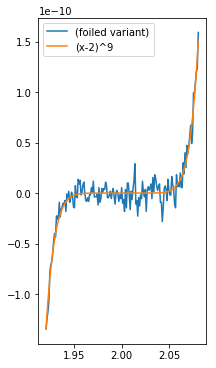

In [6]:
def test_px1(x):
    return x**9 - 18.*x**8 + 144.*x**7 - 672.*x**6 + 2016.*x**5 - 4032.*x**4 + 5376.*x**3 - 4608.*x**2 + 2304.*x - 512.

def test_px2(x):
    return (x-2)**9

x = np.arange(1.920, 2.081, 0.001)

fig, ax = plt.subplots()

#plotting the expanded form
# TODO: part (a)
ax.plot(x, test_px1(x), label="(foiled variant)")

#plotting the original function
# TODO: part (b)
ax.plot(x, test_px2(x), label="(x-2)^9")
ax.legend()
plt.show()

What we can see from comparing the two plots is that the expanded version of _p(x)_ , blue line, is prone to much more volatility in this particular toolset.  We know this to be true via the closed form _p(x)_, orange line.  The latter presented a much smoother plot, much more akin to what we know to be true for such a function.  The volatility in the blue line can, in part, be rationalized by the much more potent presence of floating point arithmetic in the expanded fucntion.  In other words, the error within the floating point arithmatic propagates and increases with each subsequent operation in _px1(x)_.  It's worth noting the granularity at which this noise is present.  In order to visually detect this variance in the plots we are functioning within the margins of 	$^+/_-1.5*10^{-10}$ on the y-axis.

2\. From the Halide Video, what are 4 ways to traverse a 2d array?

  1. Serially read by row then the columns within (Serial X, Y)
  2. Serially by row, processing vector chunks of length 'x' for each row
  3. Parallelize (via a new Thread, Process, Agent, etc...) each row read, then vectorize each row in chunks of length 'x'
  4. Via locality (ie. split into clusters of size (x, y)), but serially within each cluster.
     

3\. Using the animations below ([source](https://www.youtube.com/watch?v=3uiEyEKji0M)), explain what the benefits and pitfalls of each approach. Green squares indicate that a value is being read; red indicates a value is being written. Your answers should be longer in length (give more detail) than just two words.

  a. <img src="Halide1.gif" alt="Halide" style="width: 70%"/>
  
  b. <img src="Halide2.gif" alt="Halide" style="width: 70%"/>
  
  c. <img src="Halide3.gif" alt="Halide" style="width: 70%"/>

  a. This implementation is the most trivial to implement.  It quickly reads the data in and stores it into memory in one loop, then traverses through the data in memory once more to compute its result.  While easy to understand and quick to implement, this method is not performant and will clog resources on larger datasets.
  
  b. This method hyper optimizes in-memory usage.  By using locality to read the data in, compute the target, output its result, and clear the memory consumed within each iteration.  In practice, this code may become highly depending upond the data's context.  In certain contexts, may not even be possible.  
  
  c. This method is a smart compromise between (a) and (b), it computes the data using locality to find what targets it can during the same looped iteration to read in it's requisite data in serially by split rows.  

4\. Prove that if $A = Q B Q^T$ for some orthonogonal matrix $Q$, then$A$ and $B$ have the same singular values.

By nature of $Q$ being othogonal, we can conclude that $A$ is a square matrix whose dimensions match that of $Q$.

Furthermore, we now that the SVD of a square matrix $A$ yields the form (1) $A = Q D Q^T$, such that $D$ is a diagonal matrix whose diagonal elements represent the singular values for $A$.  Typically, the specific SVD scoped to square matrices is known as Eigendecomposition.  

Let us define the SVD of unknown matrix $B$ to be (2) $B = U \Sigma V^T$, where $U$ and $V$ are unitary matrices of dimensions (m, m) and (n, n) respectively.  Matrix $\Sigma$ is then said to be the diagonal matrix whose diagonal values correspond the the singular values of matri $B$.  

From our initial condition we have:

(3) $A = Q B Q^T$

(4) $= Q (U \Sigma V^T) Q^T$  (substitute B for $U \Sigma V^T$)

(5) $= (QU) \Sigma (VQ)^T$ (associative and transpose properties of matrix)

By extension of the analysis of the dimensions of matrices $Q$, $U$, and $V$ (in additional to the unitary property), we can conclude that both $QU$ and $(VQ)^T$ are also unitary.  Thus if we define:

(6) $F = QU$ and (7) $G = (VQ)^T$

Then we can express equations (5) as:

(8) $A = F \Sigma G^T$

Since both $F$ and $G$ are orthogonal, we've again reached the definition of the SVD of a matrix.  We can clearly see from both (8) and (2), that if $A = Q B Q^T$, both $A$ and $B$ have the same singular values from the diagonal elements of the same diagonal matrix $\sigma$


In [3]:
#quick toy example
m, n = 9, 6
A = np.random.randn(m, m)
Q = ortho_group.rvs(m)
B = Q.T @ A @ Q

# equation held within some precision
print(A - Q @ B @ Q.T < .000000000001)

U0, s0, Vt0 = linalg.svd(A)
print(s0)

U1, s1, Vt1 = linalg.svd(B)
print(s1)

[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]]
[6.0449 4.0595 3.3622 2.9339 2.0434 1.5576 1.2079 0.8837 0.2908]
[6.0449 4.0595 3.3622 2.9339 2.0434 1.5576 1.2079 0.8837 0.2908]


5\. Consider a particular species of wildflower in which each plant has several stems, leaves, and flowers, and for each plant let the following hold:

S = the average stem length (in inches)

L = the average leaf width (in inches)

F = the number of flowers

Four particular plans are examined, and the information is tabulated in the following matrix, with rows representing a single plant, and columns in the order {S, L, F}:

In [8]:
import numpy as np
flowers = np.array([[1, 1, 10],[2, 1, 12], [2, 2, 15], [3, 2, 17]])
print(flowers)

[[ 1  1 10]
 [ 2  1 12]
 [ 2  2 15]
 [ 3  2 17]]


5\. (Continued) Find the SVD of the matrix. Determine if there exists a linear relationship between S, L, and F. In other words, does there exist constants $\alpha_0$, $\alpha_1$, $\alpha_2$, $\alpha_3$ such that $\alpha_0 + \alpha_1 S + \alpha_2 L + \alpha_3 F = 0$. 

_Hint: You may want to determine yourself, via algebra, if there exists a linear relationship, then determine what parts of SVD help explain this and how_

In [9]:
# ie) Does V exist, where A * V = 0 such that V = T.[a0, ... , a3]

U, s, Vt = linalg.svd(flowers)

print(flowers.rref())

print(U)

print(s)

print(Vt)

print(linalg.eigvals(U))
print(linalg.eigvals(Vt))

AttributeError: 'numpy.ndarray' object has no attribute 'rref'

6\. Turn yourself (or a classmate) into a mermaid. Or at least show that you (they) might have played on on TV. I have included several images of dolphins and fish in the exam folder (though you are welcome to find another one if you want). If you really struggle with this, I have also included an image of a "mermaid photo board". However, if you use this, you will NOT receive full credit. 

In addition to the CODE (and final image), you need to include an explanation of the process, and the mathematics you used to accomplish this feat!

In order to 